<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
from numba import njit
from talib import BBANDS
from utils import gen_CV, hurst, hl, gen_GBM, BBANDS_return

gazp = pd.read_csv("gazp.csv", parse_dates=["Date"])
ts_ = gazp.sort_values("Date")["Close"].values

cv = gen_CV(gazp)

ts = ts_[cv[0][1]]

@njit
def crossup(x, y, i):
    if x[i - 1] < y[i - 1] and x[i] > y[i]:
        return 1
    else:
        return 0

@njit
def crossdown(x, y, i):
    if x[i - 1] > y[i - 1] and x[i] < y[i]:
        return 1
    else:
        return 0

-0.003040807432546644


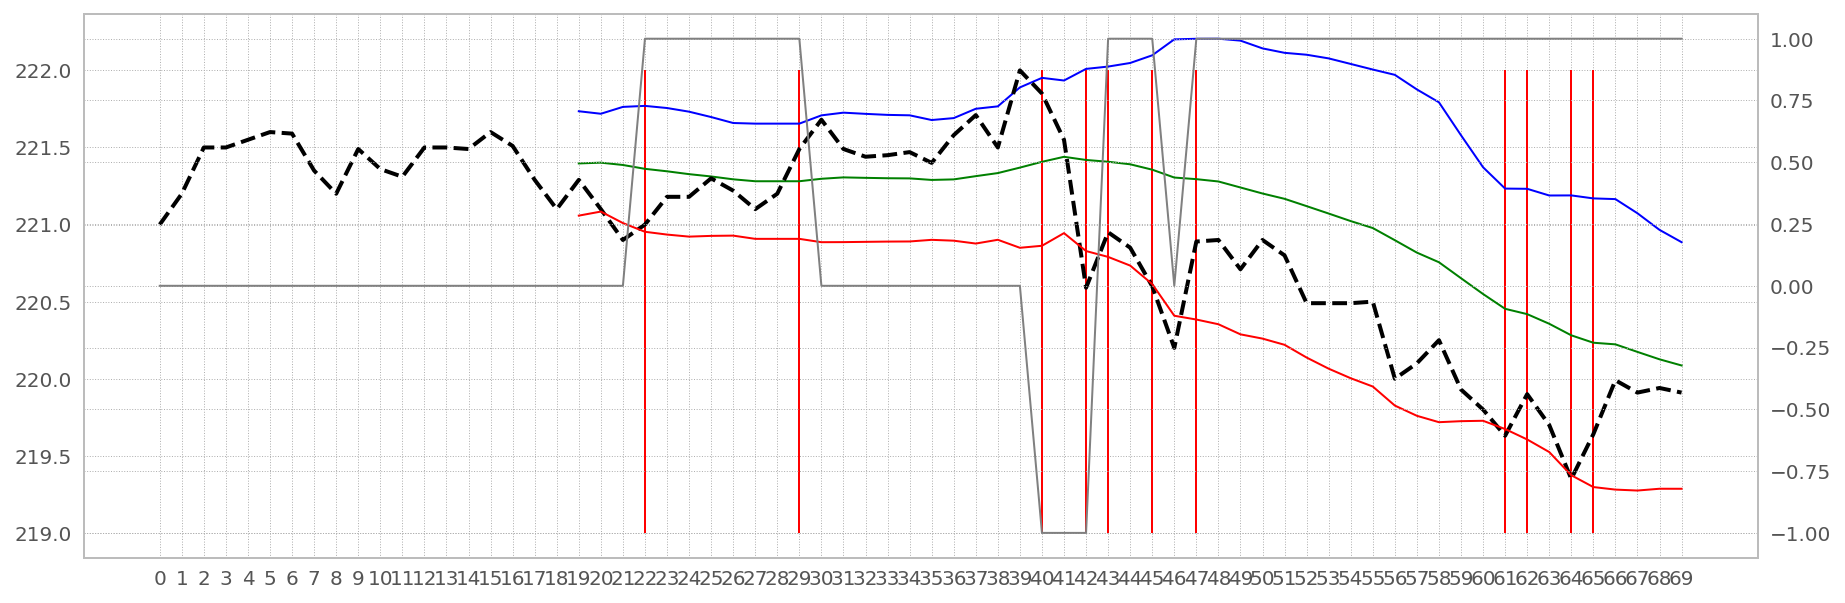

In [2]:
def np_signal(price, upper, middle, lower):

    L = price.shape[0]
    out = np.empty(L, dtype=np.int64)
    out[0] = 0
    i = 1

    while i < L:
    
        out[i] = 0
                
        if crossup(price, lower, i):
#             print("enter long", i)
            out[i] = 1
            trade = True
            while trade and i < (L - 1):
                i += 1
                out[i] = 1
                if crossup(price, middle, i) or crossdown(price, lower, i):
#                     print("exit long", i)
                    trade = False

        if crossdown(price, upper, i):
#             print("enter short", i)
            out[i] = -1
            trade = True
            while trade and i < (L - 1):
                i += 1
                out[i] = -1
                if crossdown(price, middle, i) or crossup(price, upper, i):
#                     print("exit short", i)
                    trade = False
  
        i +=1
          
    return out

ts_back = ts
ts = ts[:70]
upper, middle, lower = BBANDS(ts, 20 ,2, 2)
signal = np_signal(ts, upper, middle, lower)
ret = BBANDS_return(ts, upper, middle, lower)
print(np.multiply.reduce(1 + ret) - 1)
 
_, ax = plt.subplots()
ax.plot(upper, color="blue")
ax.plot(middle, color="green")
ax.plot(ts, color="black", linestyle="--", linewidth=2)
ax.plot(lower, color="red")
ax.set_xticks(range(70))
ax.vlines([22,29,40,42, 43, 45, 47, 61, 62, 64, 65], 219, 222, color = "red")
ax2 = ax.twinx()
ax2.plot(signal, color="grey")
df = pd.DataFrame({
    "price": ts,
    "upper": upper,
    "middle": middle,
    "lower": lower,
    "signal": signal,
    "return": 1 + ret
})
ts = ts_back
# enter long 22
# exit long 29
# enter short 40
# exit short 42
# enter long 47
# exit long 61
# enter long 62
# exit long 64
# enter long 65
# -0.003040807432546644

In [3]:
df[20:]

,price,upper,middle,lower,signal,return
20,221.10,221.718755,221.4015,221.084245,0,1.000000
21,220.90,221.763237,221.3865,221.009763,0,1.000000
22,221.00,221.769827,221.3615,220.953173,1,1.000000
23,221.18,221.755938,221.3455,220.935062,1,0.999700
24,221.18,221.732221,221.3270,220.921779,1,1.000543
25,221.30,221.697414,221.3120,220.926586,1,0.999638
26,221.22,221.658755,221.2935,220.928245,1,0.999458
27,221.10,221.654679,221.2810,220.907321,1,1.000452
28,221.20,221.654679,221.2810,220.907321,1,1.001311
29,221.49,221.654679,221.2810,220.907321,1,1.000858


```
enter long 22
exit long 29
enter short 40
exit short 42
enter long 47
exit long 61
enter long 62
exit long 64
enter long 65
```

In [4]:
@njit
def BBANDS_signal(price, upper, middle, lower):

    L = price.shape[0]
    out = np.empty(L, dtype=np.int64)
#     out[:] = 99.99
    out[0] = 0
    i = 1

    while i < L:
    
        out[i] = 0
                
        if crossup(price, lower, i):
            out[i] = 1
            trade = True
            while trade and i < (L - 1):
                i += 1
                out[i] = 1
                if crossup(price, middle, i) or crossdown(price, lower, i):
                    trade = False

        if crossdown(price, upper, i):
            out[i] = -1
            trade = True
            while trade and i < (L - 1):
                i += 1
                out[i] = -1
                if crossdown(price, middle, i) or crossup(price, upper, i):
                    trade = False
  
        i +=1
          
    return out

In [5]:
price = gen_GBM(100000)
upper, middle, lower = BBANDS(price, 20, 1, 1)
price = price[20:]
upper = upper[20:]
middle = middle[20:]
lower = lower[20:]

In [6]:
# for _ in range(1000):
#     price = gen_GBM(100000)
#     upper, middle, lower = BBANDS(price, 20, 1, 1)
#     price = price[20:]
#     upper = upper[20:]
#     middle = middle[20:]
#     lower = lower[20:]
#     ret = BBANDS_signal(price, upper, middle, lower)
#     if any(ret == 99.99):
#         print("Fail!")

In [7]:
%timeit np_signal(price, upper, middle, lower)

70.8 ms ± 274 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%timeit BBANDS_signal(price, upper, middle, lower)

547 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
